<a href="https://colab.research.google.com/github/vishal-pandey/rock-paper-scissor-dataset/blob/master/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download data from github
!git clone https://github.com/vishal-pandey/rock-paper-scissor-dataset.git

Cloning into 'rock-paper-scissor-dataset'...
remote: Enumerating objects: 10223, done.
remote: Counting objects: 100% (2244/2244), done.
remote: Compressing objects: 100% (2231/2231), done.
remote: Total 10223 (delta 15), reused 2239 (delta 11), pack-reused 7979
Receiving objects: 100% (10223/10223), 755.80 MiB | 27.18 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (16479/16479), done.


In [ ]:
directory = "/content/rock-paper-scissor-dataset/data/"

In [ ]:
dir_rock = "/content/rock-paper-scissor-dataset/rock/"
dir_paper = "/content/rock-paper-scissor-dataset/paper/"
dir_scissors = "/content/rock-paper-scissor-dataset/scissors/"

In [ ]:
import pandas as pd
import json

import numpy as np
from os.path import isfile, join
from os import listdir

In [ ]:
files_rock = [f for f in listdir(dir_rock) if isfile(join(dir_rock, f))]
files_paper = [f for f in listdir(dir_paper) if isfile(join(dir_paper, f))]
files_scissors = [f for f in listdir(dir_scissors) if isfile(join(dir_scissors, f))]


In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 389 kB/s 


In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [ ]:
X = []
y = []

hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5)

In [ ]:


for i in files_rock:
  file = dir_rock+i
  image = cv2.imread(file)

  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # print(i)
  dd = []
  landmarks = results.multi_hand_world_landmarks or []
  if(results and len(landmarks) == 0):
    continue
  for j in range(len(landmarks[0].landmark)):
    dd.append(landmarks[0].landmark[j].x)
    dd.append(landmarks[0].landmark[j].y)
    dd.append(landmarks[0].landmark[j].z)

  X.append(dd)
  y.append(0)

  print(len(y))
  

In [ ]:


for i in files_paper:
  file = dir_paper+i
  image = cv2.imread(file)

  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # print(i)
  dd = []
  landmarks = results.multi_hand_world_landmarks or []
  if(results and len(landmarks) == 0):
    continue
  for j in range(len(landmarks[0].landmark)):
    dd.append(landmarks[0].landmark[j].x)
    dd.append(landmarks[0].landmark[j].y)
    dd.append(landmarks[0].landmark[j].z)

  X.append(dd)
  y.append(1)

  print(len(y))
  

In [ ]:


for i in files_scissors:
  file = dir_scissors+i
  image = cv2.imread(file)

  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # print(i)
  dd = []
  landmarks = results.multi_hand_world_landmarks or []
  if(results and len(landmarks) == 0):
    continue
  for j in range(len(landmarks[0].landmark)):
    dd.append(landmarks[0].landmark[j].x)
    dd.append(landmarks[0].landmark[j].y)
    dd.append(landmarks[0].landmark[j].z)

  X.append(dd)
  y.append(2)

  print(len(y))
  

In [ ]:
import json

In [ ]:
json_X = json.dumps(X, indent = 4)
json_y = json.dumps(y, indent = 4)
  

with open(directory+"X.json", "w") as outfile:
    outfile.write(json_X)

with open(directory+"y.json", "w") as outfile:
    outfile.write(json_y)



In [ ]:
X = json.load(open(directory+"X.json", "r"))
y = json.load(open(directory+"y.json", "r"))

In [ ]:
# f_rock = open(directory+"rock.json")
# f_paper = open(directory+"paper.json")
# f_scissors = open(directory+"scissors.json")

# data_rock = json.load(f_rock)
# data_paper = json.load(f_paper)
# data_scissors = json.load(f_scissors)

# f_rock.close()
# f_paper.close()
# f_scissors.close()

In [ ]:
# data_rock

In [ ]:
# data_rock = np.array(data_rock, dtype=object)
# data_paper = np.array(data_paper, dtype=object)
# data_scissors = np.array(data_scissors, dtype=object)

In [ ]:
# data_rock = np.array([i for i in data_rock if i])
# data_paper = np.array([i for i in data_paper if i])
# data_scissors = np.array([i for i in data_scissors if i])

In [ ]:
# data_rock = data_rock[:, :, :3]
# data_paper = data_paper[:, :, :3]
# data_scissors = data_scissors[:, :, :3]

In [ ]:
# data_rock = data_rock.reshape(data_rock.shape[0], data_rock.shape[1] * data_rock.shape[2])
# data_paper = data_paper.reshape(data_paper.shape[0], data_paper.shape[1] * data_paper.shape[2])
# data_scissors = data_scissors.reshape(data_scissors.shape[0], data_scissors.shape[1] * data_scissors.shape[2])

In [ ]:
# data_scissors.shape

In [ ]:
# data_rock.shape[0]

In [ ]:
# y_rock = np.full((data_rock.shape[0],), 0)
# y_paper = np.full((data_paper.shape[0],), 1)
# y_scissors = np.full((data_scissors.shape[0],), 2)

In [ ]:
# X = np.concatenate((data_rock, data_paper, data_scissors))

In [ ]:
# y = np.concatenate((y_rock, y_paper, y_scissors))

In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
y.shape

(15443,)

In [ ]:
X.shape

(15443, 63)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
X_train.shape

(9265, 63)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
log_reg.score(X, y)

0.9901573528459496

In [ ]:
log_reg.score(X_train, y_train)

0.9907177549919051

In [ ]:
log_reg.score(X_test, y_test)

0.9876982842343801

In [ ]:
log_reg.score(X_val, y_val)

0.9909355778569117

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_train = OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_val = OneHotEncoder().fit_transform(y_val.reshape(-1, 1)).toarray()
y_test = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()

In [ ]:
model = Sequential()
model.add(Dense(56, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
290/290 [==============================] - 2s 3ms/step - loss: 0.1620 - accuracy: 0.8437 - val_loss: 0.0869 - val_accuracy: 0.9880
Epoch 2/10
290/290 [==============================] - 1s 2ms/step - loss: 0.0456 - accuracy: 0.9875 - val_loss: 0.0213 - val_accuracy: 0.9922
Epoch 3/10
290/290 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9919 - val_loss: 0.0097 - val_accuracy: 0.9922
Epoch 4/10
290/290 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9934 - val_loss: 0.0063 - val_accuracy: 0.9935
Epoch 5/10
290/290 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9941 - val_loss: 0.0049 - val_accuracy: 0.9942
Epoch 6/10
290/290 [==============================] - 1s 3ms/step - loss: 0.0045 - accuracy: 0.9946 - val_loss: 0.0040 - val_accuracy: 0.9942
Epoch 7/10
290/290 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9958 - val_loss: 0.0035 - val_accuracy: 0.9955
Epoch 

In [ ]:
import matplotlib.pyplot as plt

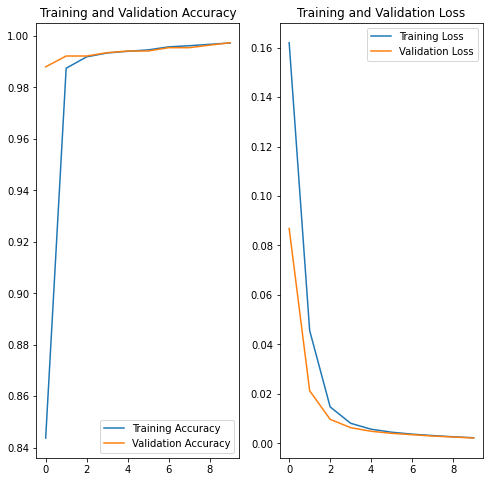

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.predict(X_test)

array([[1.1371345e-01, 1.0173998e-02, 8.7611258e-01],
       [7.9625823e-02, 8.6774427e-01, 5.2629881e-02],
       [9.9174255e-01, 8.2256884e-04, 7.4348068e-03],
       ...,
       [2.8484673e-03, 9.7988701e-01, 1.7264573e-02],
       [3.7911122e-03, 9.7814786e-01, 1.8060928e-02],
       [3.3554956e-02, 4.3702144e-02, 9.2274290e-01]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# X_test[0]

In [ ]:
vishal_hand = [
    -0.09475795179605484,
    0.022432396188378334,
    0.00475311279296875,
    -0.07399104535579681,
    -0.008666153997182846,
    0.012908935546875,
    -0.04402587562799454,
    -0.017431285232305527,
    0.03485107421875,
    -0.01129741221666336,
    -0.012424034997820854,
    0.051025390625,
    0.006018251646310091,
    0.003687663935124874,
    0.06024169921875,
    -0.004922431893646717,
    -0.030263159424066544,
    0.003513336181640625,
    0.021685369312763214,
    -0.041729897260665894,
    0.00909423828125,
    0.043104540556669235,
    -0.05095002427697182,
    0.01568603515625,
    0.0586371123790741,
    -0.06333539634943008,
    0.0202789306640625,
    0.0033345576375722885,
    -0.0059380726888775826,
    -0.0014019012451171875,
    0.04319426417350769,
    -0.007213061675429344,
    0.009185791015625,
    0.06182999163866043,
    -0.017033040523529053,
    0.01131439208984375,
    0.08427337557077408,
    -0.02176763117313385,
    0.0273895263671875,
    0.0034635858610272408,
    0.019300417974591255,
    -0.0030345916748046875,
    0.02909735217690468,
    0.017083391547203064,
    0.018402099609375,
    0.021409112960100174,
    0.011601369827985764,
    0.036468505859375,
    0.007255165837705135,
    0.010476035997271538,
    0.052734375,
    -0.007543925195932388,
    0.039486296474933624,
    0.004375457763671875,
    0.0039005009457468987,
    0.034945763647556305,
    0.0218353271484375,
    -0.0025275619700551033,
    0.028491759672760963,
    0.042266845703125,
    -0.01199113205075264,
    0.028803527355194092,
    0.044891357421875
]

In [ ]:
vishal_hand = np.array([vishal_hand])

In [ ]:
# vishal_hand = StandardScaler().fit_transform(vishal_hand)

In [ ]:
# vishal_hand

In [ ]:
model.predict(vishal_hand)

array([[0.0075072 , 0.00210957, 0.9903832 ]], dtype=float32)

In [ ]:
# X_train

In [ ]:
# log_reg.predict([X_test[0]])

In [ ]:
# y_test[0]

In [ ]:
model.save('rock-paper-scissors.h5')

In [ ]:
!sudo pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!tensorflowjs_converter --input_format=keras rock-paper-scissors.h5 rock-paper-scissors-model